In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [13]:
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report
import seaborn as sns
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('churn.csv', sep=',')

In [4]:
new_df = df.drop(['RowNumber', 'Surname', 'CustomerId', 'Exited'], axis=1)

In [6]:
avr = new_df['Tenure'].mean()
new_df['Tenure'] = new_df['Tenure'].fillna(np.int64(avr))

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
features = pd.get_dummies(new_df)
target = df['Exited']

In [9]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, 
                                                                              random_state=12345)

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, 
                                                                              random_state=12345)

In [10]:
pd.options.mode.chained_assignment = None
scaler=StandardScaler()
numeric=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler.fit(features_train[numeric])
features_train[numeric]=scaler.transform(features_train[numeric])
features_valid[numeric]=scaler.transform(features_valid[numeric])

In [10]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
226,0.442805,-0.841274,1.471429,-1.224577,0.817772,1,1,-1.269750,1,0,0,1,0
7756,-0.310897,-0.270730,0.748652,0.641783,-0.896874,1,1,0.960396,0,0,1,1,0
2065,-0.259274,-0.556002,1.110041,-1.224577,0.817772,1,0,0.661864,1,0,0,0,1
2800,1.217157,1.155631,1.471429,1.290462,0.817772,1,0,-1.039476,1,0,0,0,1
7028,0.690598,-1.221637,-0.335513,1.142121,-0.896874,0,0,-0.851729,0,1,0,0,1


In [16]:
clf = DecisionTreeClassifier(max_depth=6, random_state=12345, class_weight='balanced')
clf = clf.fit(features_train,target_train)
target_pred = clf.predict(features_valid)

In [20]:
print("Accuracy:",metrics.accuracy_score(target_valid, target_pred))

Accuracy: 0.7696


In [25]:
clf1=RandomForestClassifier(n_estimators=100, random_state=12345, max_depth=9)
clf1.fit(features_train,target_train)
y_pred=clf1.predict(features_valid)

In [73]:
print("Accuracy:",metrics.accuracy_score(target_valid, y_pred))

Accuracy: 0.8516


In [14]:
logisticRegr = LogisticRegression(random_state=12345)
clf2 = logisticRegr.fit(features_train,target_train)
w_pred=clf2.predict(features_valid)

In [49]:
prediction = pd.Series([0 for i in target_valid])
metrics.accuracy_score(target_valid, prediction)

0.786

In [23]:
lr = LogisticRegression(random_state=12345)
lr.fit(features_train, target_train)

LogisticRegression(random_state=12345)

Confusion matrix, without normalization
[[1887   78]
 [ 430  105]]


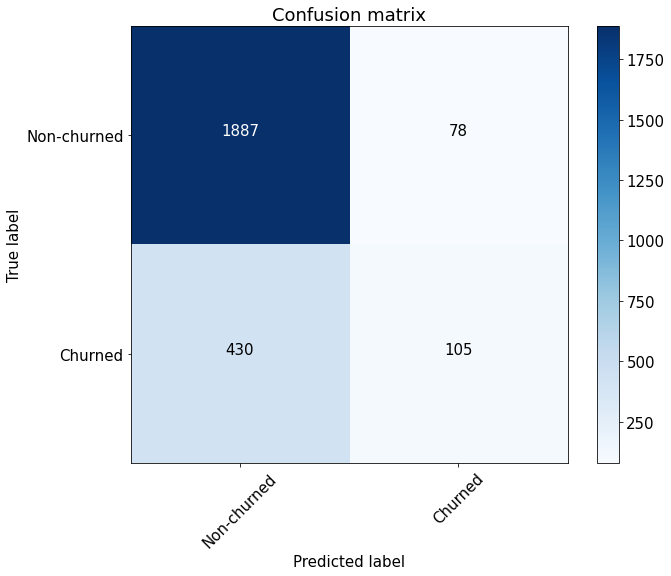

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(target_valid, lr.predict(features_valid))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [37]:
f1 = 0
estimators = 0
maxdepth = 0

for estim in range(60, 70):
    for md in range(1, 10):
        test_rfclf = RandomForestClassifier(n_estimators=estim, max_depth=md, random_state=12345, class_weight='balanced')
        test_rfclf.fit(features_train, target_train)
        test_pred = test_rfclf.predict(features_valid)
        f1_metric = f1_score(target_valid, test_pred)
        if f1_metric > f1:
            f1 = f1_metric
            estimators = estim
            maxdepth = md
            
print(estimators, maxdepth)
rand_for_clf = RandomForestClassifier(n_estimators=estimators, max_depth=maxdepth, random_state=12345, class_weight='balanced')
rand_for_clf.fit(features_train, target_train)
pred = rand_for_clf.predict(features_valid)

print('Accuracy: ', metrics.accuracy_score(target_valid, pred))
print('F1: ', f1_score(target_valid, pred))
print('Recall: ', recall_score(target_valid, pred))
print('Precision: ', precision_score(target_valid, pred))

63 8
Accuracy:  0.8296
F1:  0.6432160804020101
Recall:  0.7177570093457943
Precision:  0.582701062215478


In [36]:
f1_dt = 0
maxdepth_dt = 0

for md in range(1, 25):
    test_dtclf = DecisionTreeClassifier(max_depth=md, random_state=12345, class_weight='balanced')
    test_dtclf.fit(features_train, target_train)
    test_pred_dt = test_dtclf.predict(features_valid)
    f1_metric_dt = f1_score(target_valid, test_pred_dt)
    if f1_metric_dt > f1_dt:
        f1_dt = f1_metric_dt
        maxdepth_dt = md
print(maxdepth_dt)            
dec_tree_clf = DecisionTreeClassifier(max_depth=maxdepth_dt, random_state=12345, class_weight='balanced')
dec_tree_clf.fit(features_train, target_train)
pred_dt = dec_tree_clf.predict(features_valid)

print('Accuracy: ', metrics.accuracy_score(target_valid, pred_dt))
print('F1: ', f1_score(target_valid, pred_dt))
print('Recall: ', recall_score(target_valid, pred_dt))
print('Precision: ', precision_score(target_valid, pred_dt))

5
Accuracy:  0.8024
F1:  0.6016129032258064
Recall:  0.697196261682243
Precision:  0.5290780141843971
